In [1]:
!pip install dlib

In [2]:
import numpy as np
import cv2
import dlib
import os
from imutils import face_utils
from google.colab import drive
from google.colab.patches import cv2_imshow

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
path = '/content/drive/MyDrive/test_opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['image_2260.jpg', 'image_2400.jpg', 'models', '27.ipynb', 'People.jpg']

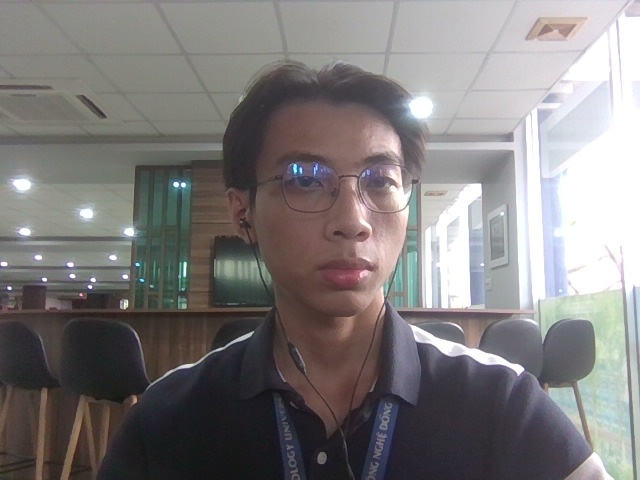

In [15]:
img = cv2.imread(path + '/image_2400.jpg')
cv2_imshow(img)

(1, 1, 200, 7)
[0.         1.         0.99724835 0.39081806 0.2110859  0.63986415
 0.6563295 ]
[0.39081806 0.2110859  0.63986415 0.6563295 ]
250 101 409 315


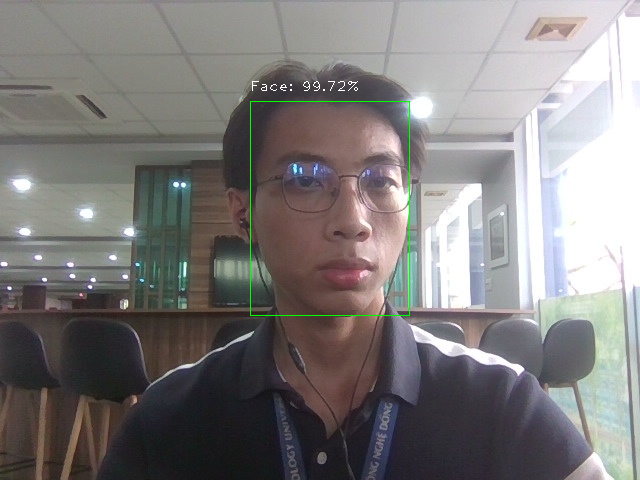

In [16]:
net = cv2.dnn.readNetFromCaffe(path + '/models/deploy.prototxt.txt.prototxt', path + '/models/res10_300x300_ssd_iter_140000_fp16.caffemodel')

blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104, 177, 123), swapRB=False)

# Đặt dữ liệu đầu vào cho mạng
net.setInput(blob)

# Chạy mạng để phát hiện khuôn mặt
faces = net.forward()

# Lấy kích thước của ảnh đầu vào
h = img.shape[0]
w = img.shape[1]

# In thông tin
print(faces.shape)
print(faces[0, 0, 0, ])

# Duyệt từng khuôn mặt đã được phát hiện
for i in range(0, faces.shape[2]):
    confidence = faces[0,0,i,2]
    # Kiểm tra nếu mặt có độ tin cậy là 0.5
    if confidence>0.5:
        # Trích xuất tọa độ
        print(faces[0, 0, i, 3:7])
        startx = int(faces[0, 0, i, 3]*w)
        starty = int(faces[0, 0, i, 4]*h)
        endx = int(faces[0, 0, i, 5]*w)
        endy = int(faces[0, 0, i, 6]*h)
        print(startx, starty, endx, endy)

        # Vẽ hình chữ nhật xung quanh khuôn mặt đã phát hiện
        cv2.rectangle(img, (startx, starty), (endx, endy), (0, 255, 0),)

        # Hiển thị độ tin cậy
        text = 'Face: {:.2f}%'.format(confidence*100);
        cv2.putText(img, text, (startx, starty-10), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255),)

# Hiển thị ảnh gốc
cv2_imshow(img)